In [2]:
import tushare as ts

import pandas as pd

from bs4 import BeautifulSoup

import requests

In [122]:
import re

In [3]:
ts.set_token('7d5a6fe965078ccd9582f30f92378d219cda9e7a02be57d06758f3aa')

In [4]:
pro = ts.pro_api()

In [35]:
df=pro.daily(ts_code='002127.SZ')

In [36]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002127.SZ,20201023,20.18,20.78,19.15,19.31,20.20,-0.89,-4.4059,459705.78,901370.382
1,002127.SZ,20201022,20.09,20.35,19.63,20.20,20.13,0.07,0.3477,242584.82,486186.761
2,002127.SZ,20201021,20.09,20.62,19.66,20.13,20.35,-0.22,-1.0811,233922.08,469422.910
3,002127.SZ,20201020,19.37,20.48,19.06,20.35,19.36,0.99,5.1136,357727.17,712932.783
4,002127.SZ,20201019,19.58,19.95,19.10,19.36,19.31,0.05,0.2589,221045.61,431230.368


In [346]:
all_stocks = pro.stock_basic()

In [379]:
for code in tqdm(all_stocks.ts_code[3032:]):
    daily=pro.daily(ts_code=code)
    adj=pro.adj_factor(ts_code=code)
    daily = daily.merge(adj, how='left', on=['ts_code', 'trade_date'])

    daily['date'] = pd.to_datetime(daily['trade_date'])
    daily = daily.set_index('date')
    
    lib.write(code, daily, chunk_size='M')

100%|██████████████████████████████████████████████████████████████████████████████| 1008/1008 [27:54<00:00,  1.66s/it]


In [378]:
np.where(all_stocks.ts_code == code)

(array([3032], dtype=int64),)

In [377]:
code

'600882.SH'

In [373]:
np.where(all_stocks.ts_code==code)

(array([2141], dtype=int64),)

In [41]:
from arctic import Arctic, CHUNK_STORE

In [42]:
a = Arctic('localhost')

In [60]:
a.delete_library('stock')

In [61]:
lib = a.initialize_library('stock', CHUNK_STORE)

In [62]:
lib = a['stock']

In [56]:
import pandas as pd

In [63]:
df['date'] = pd.to_datetime(df['trade_date'])
lib.write('002127.SZ', df.set_index('date'), chunk_size='M')

In [76]:
df.tail()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,date
index,,,,,,,,,,,,
2934,002127.SZ,20070424,20.50,20.60,20.15,20.22,20.43,-0.21,-1.03,25409.56,51782.8749,2007-04-24
2935,002127.SZ,20070423,20.06,20.47,19.81,20.43,20.22,0.21,1.04,27315.72,55100.2107,2007-04-23
2936,002127.SZ,20070420,19.58,20.50,19.50,20.22,19.26,0.96,4.98,28276.35,56797.9395,2007-04-20
2937,002127.SZ,20070419,20.40,20.40,19.15,19.26,20.82,-1.56,-7.49,54120.09,106289.2690,2007-04-19
2938,002127.SZ,20070418,25.00,25.00,20.71,20.82,9.40,11.42,121.49,135944.62,299393.0157,2007-04-18


In [64]:
df2 = lib.read('002127.SZ', chunk_range=pd.bdate_range('2017-01-01', '2020-10-23'))

In [362]:
daily=pro.daily(ts_code='002271.SZ')
adj=pro.adj_factor(ts_code='002271.SZ')
daily = daily.merge(adj, how='left', on=['ts_code', 'trade_date'])

daily['date'] = pd.to_datetime(daily['trade_date'])
daily = daily.set_index('date')

In [366]:
lib.delete('002127.SZ')

In [78]:
all_stock = pro.stock_basic()

In [79]:
stocks = "sz002127,sz002384,sz002475,sz002271,sz300142,sz000975,sz000858,sz300253,sz300750,sz000547".split(',')

In [80]:
ts_codes = [ s[2:]+'.'+s[:2].upper() for s in stocks]

In [83]:
all_stock.set_index('ts_code').reindex(ts_codes)

,symbol,name,area,industry,market,list_date
ts_code,,,,,,
002127.SZ,002127,南极电商,江苏,互联网,中小板,20070418
002384.SZ,002384,东山精密,江苏,元器件,中小板,20100409
002475.SZ,002475,立讯精密,深圳,元器件,中小板,20100915
002271.SZ,002271,东方雨虹,北京,其他建材,中小板,20080910
300142.SZ,300142,沃森生物,云南,生物制药,创业板,20101112
000975.SZ,000975,银泰黄金,内蒙,黄金,主板,20000608
000858.SZ,000858,五粮液,四川,白酒,主板,19980427
300253.SZ,300253,卫宁健康,上海,软件服务,创业板,20110818
300750.SZ,300750,宁德时代,福建,电气设备,创业板,20180611


In [381]:
all_stock.industry.unique()

array(['银行', '全国地产', '互联网', '环境保护', '区域地产', '酒店餐饮', '运输设备', '综合类', '建筑工程',
       '玻璃', '家用电器', '文教休闲', '其他商业', '元器件', 'IT设备', '其他建材', '汽车服务',
       '火力发电', '医药商业', '汽车配件', '广告包装', '轻工机械', '新型电力', '多元金融', '饲料',
       '电气设备', '房产服务', '石油加工', '铅锌', '农业综合', '批发业', '通信设备', '旅游景点', '港口',
       '机场', '石油贸易', '空运', '医疗保健', '商贸代理', '化学制药', '影视音像', '工程机械', '软件服务',
       '证券', '化纤', '水泥', '生物制药', '专用机械', '供气供热', '农药化肥', '机床制造', '百货',
       '中成药', '路桥', '造纸', '食品', '黄金', '化工原料', '矿物制品', '水运', '日用化工',
       '机械基件', '汽车整车', '煤炭开采', '铁路', '染料涂料', '白酒', '林业', '水务', '水力发电',
       '旅游服务', '纺织', '铝', '保险', '园区开发', '小金属', '铜', '普钢', '航空', '特种钢',
       '种植业', '出版业', '焦炭加工', '啤酒', '公路', '超市连锁', '钢加工', '渔业', '农用机械',
       '软饮料', '化工机械', '塑料', '红黄酒', '橡胶', '家居用品', '摩托车', '电器仪表', '服饰',
       '仓储物流', '纺织机械', '电器连锁', '装修装饰', '半导体', '电信运营', '石油开采', '乳制品',
       '商品城', '公共交通', '陶瓷', '船舶'], dtype=object)

In [106]:
lib_fund_holding = a['fund_holding']

In [145]:
import numpy as np

In [148]:
fund_list = np.loadtxt('./refData/AvailableFundList.txt', dtype='str')

In [150]:
!pip install tqdm

In [151]:
from tqdm import tqdm

In [205]:
for fund in tqdm(fund_list[1100:]):
    url = 'http://finance.sina.com.cn/fund/quotes/{}/bc.shtml'.format(fund)
    html = requests.get(url)

    bs = BeautifulSoup(html.content)
    
    tbl = bs.find('table', {'id':'fund_sdzc_table'})
    if tbl is None or tbl.tbody.text=='\n':``
        continue

    pat = re.compile('\d\d\d\d-\d\d-\d\d')
    report_date = pd.to_datetime( pat.findall(bs.find('div', {'class':'zqx_zcpz_date'}).text)[0] )

    stocks = tbl.attrs['codelist'].split(',')

    ts_codes = [ s[2:]+'.'+s[:2].upper() for s in stocks]

    holding = pd.read_html(tbl.prettify())[0]

    data_dict = dict(zip(ts_codes, holding[('占净值比例（%）',  '持股比例')].str[:-1].astype(float)))

    data = pd.DataFrame.from_dict(data_dict, 'index', columns=['holding'])

    lib_fund_holding.write(fund, data, metadata={'report_date':report_date})

100%|██████████████████████████████████████████████████████████████████████████████| 2287/2287 [36:57<00:00,  1.03it/s]


In [207]:
all_symbols = lib_fund_holding.list_symbols()

In [209]:
temp = []
for symbol in all_symbols:
    df = lib_fund_holding.read(symbol).data
    temp.append(df.assign(symbol=symbol))
holding = pd.concat(temp)

In [212]:
holding.index.name = 'ts_code'

In [213]:
holding = holding.reset_index(drop=False)

In [214]:
holding

,ts_code,holding,symbol
0,002127.SZ,7.99,000001
1,002384.SZ,5.50,000001
2,002475.SZ,4.58,000001
3,002271.SZ,4.41,000001
4,300142.SZ,4.18,000001
5,000975.SZ,3.69,000001
6,000858.SZ,3.17,000001
7,300253.SZ,3.03,000001
8,300750.SZ,2.98,000001
9,000547.SZ,2.82,000001


In [216]:
!pip install networkx

In [242]:
!pip install xlrd

In [284]:
all_stock.query('symbol=="000063"')

,ts_code,symbol,name,area,industry,market,list_date
46,000063.SZ,000063,中兴通讯,深圳,通信设备,主板,19971118


In [289]:
df_it=ts.get_k_data('000993', index=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [292]:
import tushare.stock.cons as ct

In [297]:
all_index = pro.index_basic(market='SSE')

In [329]:
idx_mkts = ['CSI',
            'SSE', 
            'SZSE',
            'CICC',]

In [330]:
all_index = pd.concat( [pro.index_basic(market=mkt) for mkt in idx_mkts ] )

In [331]:
all_index.to_csv('./refData/AllIndex.csv')

In [431]:
all_index.query('category=="一级行业指数" and market=="SSE"')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
29,000032.SH,上证能源,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
30,000033.SH,上证材料,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
31,000034.SH,上证工业,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
32,000035.SH,上证可选,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
33,000036.SH,上证消费,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
34,000037.SH,上证医药,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
35,000038.SH,上证金融,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
36,000039.SH,上证信息,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
37,000040.SH,上证电信,SSE,中证公司,一级行业指数,20031231,1000.0,20090109
38,000041.SH,上证公用,SSE,中证公司,一级行业指数,20031231,1000.0,20090109


In [344]:
all_index.category.unique()

array(['主题指数', '规模指数', '策略指数', '债券指数', '一级行业指数', '价值指数', '成长指数', '二级行业指数',
       '四级行业指数', '其他', '其他指数', '三级行业指数', '商品指数', '行业指数', '综合指数', '风格指数'],
      dtype=object)

In [385]:
stock = lib.read('000166.SZ')

In [387]:
stock['pct_chg']

date
2015-01-26    32.0600
2015-01-27    -9.7700
2015-01-28    -3.1600
2015-01-29     2.5000
2015-01-30    -4.2600
               ...   
2020-10-19    -0.9174
2020-10-20    -0.5556
2020-10-21    -0.5587
2020-10-22     0.3745
2020-10-23    -0.9328
Name: pct_chg, Length: 1368, dtype: float64

In [396]:
it_ew = ts.get_k_data('000077', index=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [397]:
it_ew['pct_chg'] = it_ew['close'].pct_change()*100.

In [402]:
it_ew['date'] = pd.to_datetime(it_ew['date'])

In [412]:
train = it_ew.merge(stock[['pct_chg']], how='left', left_on='date', right_index=True)

In [406]:
!pip install scikit-learn

In [407]:
from sklearn.linear_model import LinearRegression

In [423]:
model = LinearRegression(fit_intercept=False)

In [424]:
x, y = train[['pct_chg_x']].fillna(0.0), train['pct_chg_y'].fillna(0.0)

In [425]:
model.fit(x,y)

LinearRegression(fit_intercept=False)

In [426]:
beta = model.coef_

array([0.64132285])

In [432]:
it_ew = ts.get_k_data('000908', index=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [436]:
all_index['symbol'] = all_index['ts_code'].str.split('.', expand=True)[0]

In [441]:
symbols = [ "{:06d}".format(i) for i in range(908, 918) ]

In [443]:
all_index.query('symbol in @symbols')

,ts_code,name,market,publisher,category,base_date,base_point,list_date,symbol
69,000908.CSI,沪深300能源,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000908
70,000909.CSI,沪深300材料,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000909
71,000910.CSI,沪深300工业,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000910
72,000911.CSI,沪深300可选,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000911
73,000912.CSI,沪深300消费,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000912
74,000915.CSI,沪深300信息,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000915
75,000916.CSI,沪深300电信,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000916
76,000917.CSI,沪深300公用,CSI,中证公司,一级行业指数,20041231,1000.0,20070702,000917
206,000913.SH,沪深300医药,SSE,中证公司,一级行业指数,20041231,1000.0,20070702,000913
207,000914.SH,沪深300金融,SSE,中证公司,一级行业指数,20041231,1000.0,20070702,000914


In [446]:
indexDf = pd.concat([ts.get_k_data(symbol, index=True) for symbol in symbols])

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [456]:
indexDf['date'] = pd.to_datetime(indexDf.date)

In [457]:
train = indexDf.pivot_table('close', 'date', 'code').pct_change()

In [469]:
train = train.merge(stock[['pct_chg']]/100., left_index=True, right_index=True).dropna()

In [461]:
from sklearn.linear_model import Lasso

In [493]:
import matplotlib.pyplot as plt

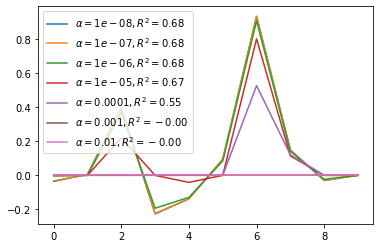

In [496]:
for alpha in np.logspace(-8, -2, 7):
    model = Lasso(alpha=alpha, fit_intercept=False)
    codes = ['sh'+s for s in symbols]
    X = train[codes]
    y = train['pct_chg']
    model.fit(X, y)
    score = model.score(X, y)
    plt.plot(model.coef_, label=r"$\alpha={}, R^2={:.2f}$".format(alpha, score))
plt.legend()

In [498]:
alpha = 1e-5
model = Lasso(alpha=alpha, fit_intercept=False)
codes = ['sh'+s for s in symbols]
X = train[codes]
y = train['pct_chg']
model.fit(X, y)

Lasso(alpha=1e-05, fit_intercept=False)

In [499]:
model.coef_

array([ 0.        ,  0.        ,  0.22084935, -0.        , -0.04116549,
        0.        ,  0.80173687,  0.11402163,  0.        ,  0.        ])

In [500]:
symbols

['000908',
 '000909',
 '000910',
 '000911',
 '000912',
 '000913',
 '000914',
 '000915',
 '000916',
 '000917']

In [502]:
all_stocks.query('ts_code=="000166.SZ"')

,ts_code,symbol,name,area,industry,market,list_date
67,000166.SZ,000166,申万宏源,新疆,证券,主板,20150126


In [503]:
model = LinearRegression(fit_intercept=False)

In [511]:
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [512]:
model.coef_

array([-0.03600311,  0.00621613,  0.39829464, -0.22679042, -0.1379912 ,
        0.09503228,  0.93494777,  0.14917862, -0.03031125,  0.0015242 ])

In [513]:
model.score(X, y)

0.6848589604498745

In [506]:
model.fit(X[['sh000914']], y)

LinearRegression(fit_intercept=False)

In [507]:
model.coef_

array([1.08543967])

In [508]:
model.intercept_

0.0

In [509]:
model.score(X[['sh000914']], y)

0.6385650059100298

In [514]:
y_hat = model.predict(X)

In [515]:
resid = y - y_hat

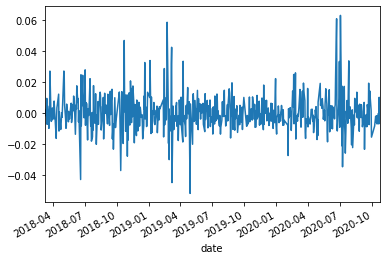

In [517]:
resid.plot()

In [529]:
all_stocks2=ts.get_stock_basics(date='2019-10-22')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [531]:
all_stocks3=ts.get_stock_basics(date='2019-10-23')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [532]:
all_stocks2.query('index=="000882"')

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
000882,华联股份,百货,北京,79.03,24.82,27.37,125.88,63.81,0.47,46.77,...,2.88,0.83,19980616,2.28,0.08,2.92,-85.99,48.48,6.77,125100.0


In [533]:
all_stocks3.query('index=="000882"')

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
000882,华联股份,百货,北京,75.74,24.82,27.37,125.88,63.81,0.47,46.77,...,2.88,0.8,19980616,2.28,0.08,2.92,-85.99,48.48,6.77,125100.0


In [539]:
from scipy.stats import zscore

In [549]:
dates = pd.bdate_range('2016-08-09', '2020-10-23')

In [550]:
pd.concat( [] )

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


HTTPError: HTTP Error 404: Not Found

In [552]:
res = []
for d in dates:
    print(d)
    try:
        fina = ts.get_stock_basics(date=d.strftime('%Y-%m-%d')).assign(date=d)
    except Exception as e:
        print(str(e))
    else:
        res.append(fina)

2016-08-09 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-10 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
HTTP Error 404: Not Found
2016-08-11 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-12 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-15 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-16 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-17 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-18 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-19 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
HTTP Error 404: Not Found
2016-08-22 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-23 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-24 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-25 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2016-08-26 0

In [553]:
stock_basics = pd.concat(res)

In [556]:
stock_basics = stock_basics.reset_index(drop=False)

In [557]:
stock_basics.to_csv('./refData/AllStocks.csv')

In [584]:
a.initialize_library('stock_basics', CHUNK_STORE)

In [585]:
lib_basics = a['stock_basics']

In [561]:
all_codes = stock_basics['code'].unique()

In [562]:
len(all_codes)

4116

In [576]:
stock.columns

Index(['code', 'name', 'industry', 'area', 'pe', 'outstanding', 'totals',
       'totalAssets', 'liquidAssets', 'fixedAssets', 'reserved',
       'reservedPerShare', 'esp', 'bvps', 'pb', 'timeToMarket', 'undp',
       'perundp', 'rev', 'profit', 'gpr', 'npr', 'holders'],
      dtype='object')

In [575]:
stock.astype(float, errors='ignore')

,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
date,,,,,,,,,,,,,,,,,,,,,
2016-08-09,300530,N达志,化工原料,广东,26.34,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,3.27,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-11,300530,达志科技,化工原料,广东,31.87,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,3.95,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-12,300530,达志科技,化工原料,广东,35.05,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,4.35,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-15,300530,达志科技,化工原料,广东,38.56,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,4.78,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-16,300530,达志科技,化工原料,广东,42.42,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,5.26,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-17,300530,达志科技,化工原料,广东,46.66,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,5.79,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-18,300530,达志科技,化工原料,广东,51.33,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,6.36,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-22,300530,达志科技,化工原料,广东,62.10,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,7.70,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-23,300530,达志科技,化工原料,广东,68.32,1750.00,7000.00,29978.77,21553.43,1395.20,...,5.27,8.47,20160809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [578]:
num_cols = ['outstanding', 'totals',
       'totalAssets', 'liquidAssets', 'fixedAssets', 'reserved',
       'reservedPerShare', 'esp', 'bvps', 'pb', 'undp',
       'perundp', 'rev', 'profit', 'gpr', 'npr', 'holders']

In [579]:
for col in num_cols:
    stock[col] = pd.to_numeric(stock[col], errors='coerce')

In [580]:
stock['timeToMarket'] = pd.to_datetime(stock['timeToMarket'].astype(int).astype(str))

In [605]:
for symbol in tqdm(all_codes[3164:]):
    stock = stock_basics.query('code==@symbol').set_index('date')
    for col in num_cols:
        stock[col] = pd.to_numeric(stock[col], errors='coerce')
    stock['timeToMarket'] = pd.to_datetime(stock['timeToMarket'].fillna(0.0).astype(int).astype(str), errors='coerce')
    lib_basics.write(symbol, stock, chunk_size='M')

100%|████████████████████████████████████████████████████████████████████████████████| 952/952 [03:18<00:00,  4.79it/s]


In [583]:
a.delete_library('stock_basics')

In [607]:
all_stocks.industry.unique()

array(['银行', '全国地产', '互联网', '环境保护', '区域地产', '酒店餐饮', '运输设备', '综合类', '建筑工程',
       '玻璃', '家用电器', '文教休闲', '其他商业', '元器件', 'IT设备', '其他建材', '汽车服务',
       '火力发电', '医药商业', '汽车配件', '广告包装', '轻工机械', '新型电力', '多元金融', '饲料',
       '电气设备', '房产服务', '石油加工', '铅锌', '农业综合', '批发业', '通信设备', '旅游景点', '港口',
       '机场', '石油贸易', '空运', '医疗保健', '商贸代理', '化学制药', '影视音像', '工程机械', '软件服务',
       '证券', '化纤', '水泥', '生物制药', '专用机械', '供气供热', '农药化肥', '机床制造', '百货',
       '中成药', '路桥', '造纸', '食品', '黄金', '化工原料', '矿物制品', '水运', '日用化工',
       '机械基件', '汽车整车', '煤炭开采', '铁路', '染料涂料', '白酒', '林业', '水务', '水力发电',
       '旅游服务', '纺织', '铝', '保险', '园区开发', '小金属', '铜', '普钢', '航空', '特种钢',
       '种植业', '出版业', '焦炭加工', '啤酒', '公路', '超市连锁', '钢加工', '渔业', '农用机械',
       '软饮料', '化工机械', '塑料', '红黄酒', '橡胶', '家居用品', '摩托车', '电器仪表', '服饰',
       '仓储物流', '纺织机械', '电器连锁', '装修装饰', '半导体', '电信运营', '石油开采', '乳制品',
       '商品城', '公共交通', '陶瓷', '船舶'], dtype=object)

In [611]:
all_index[all_index['name'].str.startswith('全指')]

,ts_code,name,market,publisher,category,base_date,base_point,list_date,symbol
129,000988.CSI,全指工业,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,000988
130,000994.CSI,全指电信,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,000994
131,000995.CSI,全指公用,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,000995
1425,h00986.CSI,全指能源全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00986
1426,h00987.CSI,全指材料全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00987
1427,h00988.CSI,全指工业全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00988
1428,h00989.CSI,全指可选全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00989
1429,h00990.CSI,全指消费全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00990
1430,h00991.CSI,全指医药全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00991
1431,h00992.CSI,全指金融全收益,CSI,中证公司,一级行业指数,20041231,1000.0,20110802,h00992


In [612]:
codes

['sh000908',
 'sh000909',
 'sh000910',
 'sh000911',
 'sh000912',
 'sh000913',
 'sh000914',
 'sh000915',
 'sh000916',
 'sh000917']